In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
# total number that completed the preparator class and those that did not
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [18]:
# number of students parental level of education 
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [5]:
# data['test preparation course'] == ' Complete'
data1 = data[data['test preparation course'] == 'completed']
data1['test preparation course'].value_counts()

completed    358
Name: test preparation course, dtype: int64

In [19]:
# gender and their level of participation for the participatory class 
data.groupby('gender')['test preparation course'].value_counts()

gender  test preparation course
female  none                       334
        completed                  184
male    none                       308
        completed                  174
Name: test preparation course, dtype: int64

In [20]:
# creating a new column for student scores percentage 
data['Percentage'] = (data['math score']+data['reading score']+data['writing score'])//3

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [9]:
# creating a grade for student performance using the new column created (Percentage)
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
data["grade"] = data.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [10]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72,B
1,female,group C,some college,standard,completed,69,90,88,82,A
2,female,group B,master's degree,standard,none,90,95,93,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,E
4,male,group C,some college,standard,none,76,78,75,76,B


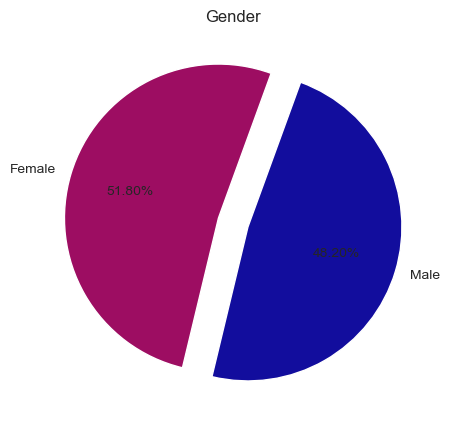

In [22]:
# creating a pie chart plot for the percentage of gender particiption in the test 
# male 48.20
# Female 51.80
plt.figure(figsize=(10, 5))
labels=['Female', 'Male']
plt.pie(data['gender'].value_counts(),labels=labels,explode=[0.1,0.1],autopct='%1.2f%%',colors=['#9d0d62','#120d9d'], startangle=70)
plt.title('Gender')
plt.show()

In [12]:
# Out of the total number of students, 51.89% are females while 48.20% are males.

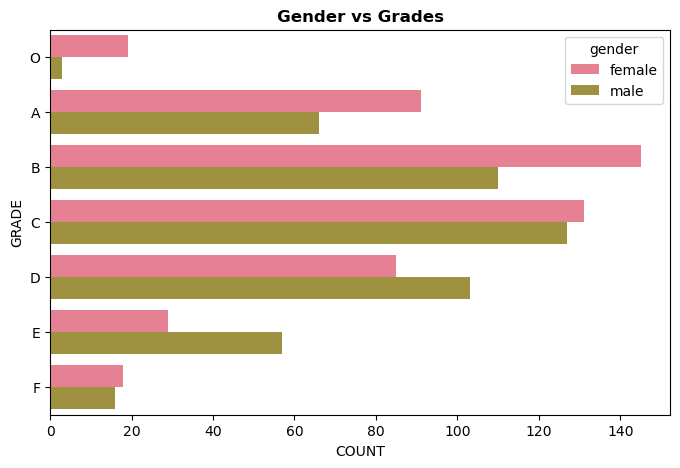

In [13]:
# checking for the student grades depending on the gender column 
plt.figure(figsize=(8,5))
sns.set_palette("husl",5)
ax = sns.countplot(y="grade", hue="gender", data=data, order=["O","A","B","C","D","E","F"])
plt.title('Gender vs Grades', fontsize=12, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

In [14]:
data.corr()

,math score,reading score,writing score,Percentage
math score,1.000000,0.817580,0.802642,0.918771
reading score,0.817580,1.000000,0.954598,0.970048
writing score,0.802642,0.954598,1.000000,0.965409
Percentage,0.918771,0.970048,0.965409,1.000000


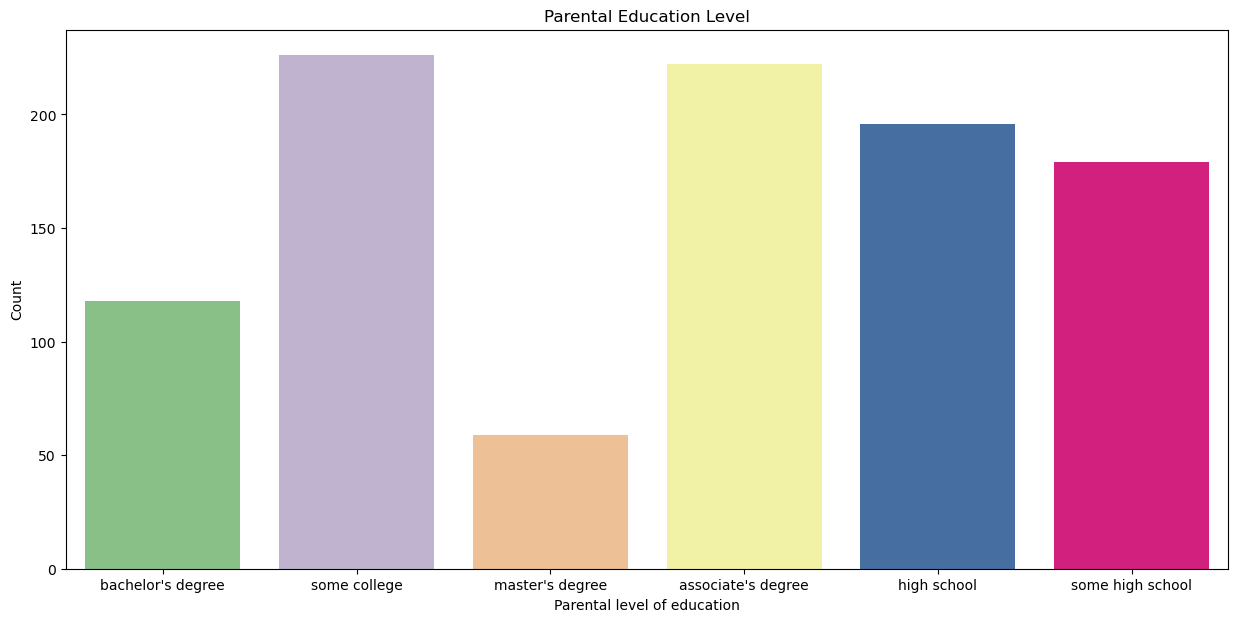

In [15]:
# parental level of education on a plot
plt.figure(figsize=(15,7))
sns.countplot(x='parental level of education', data=data,palette='Accent')
plt.xlabel('Parental level of education')
plt.ylabel('Count')
plt.title('Parental Education Level')
plt.show()

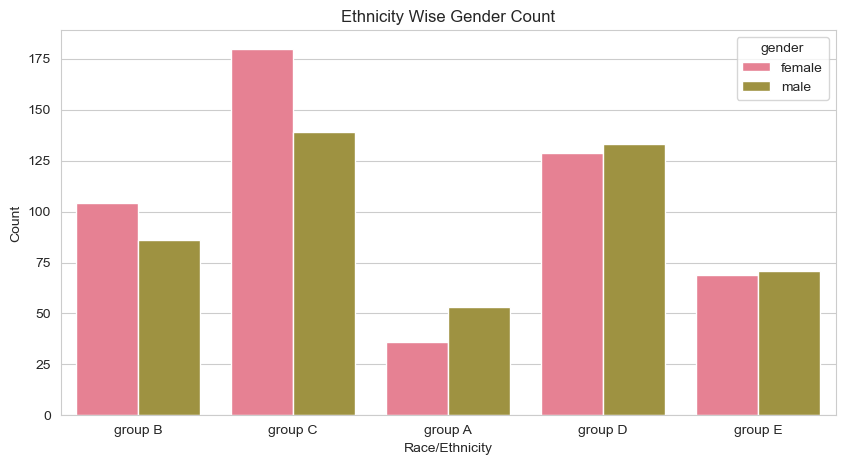

In [16]:
# group based on race/ ethnicity checking the total number of gender involved 

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='race/ethnicity', data=data, hue="gender")
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Wise Gender Count')
plt.show()